In [ ]:
# default_exp stft

In [ ]:
#hide 
%load_ext autoreload
%autoreload 2

In [ ]:
#export
from rtma.imports import *
from rtma.signal import *
from rtma.fft import *

# STFT / COLA

## Analyze a single frame with window

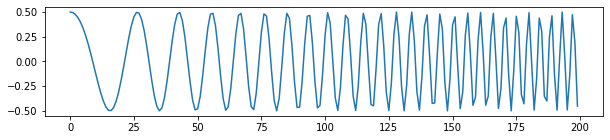

In [ ]:
sr = 100
amp = 0.5
n_fft = 128
freq = [sr / n_fft * f for f in [3, 17]]
num_samples = 200
m = 97
h = 48
x = gen_sinusoid(amp, freq=freq, sample_rate=sr, num_samples=num_samples)
plot(x)

In [ ]:
get_window('hann', 5, False)

array([0. , 0.5, 1. , 0.5, 0. ])

In [ ]:
x.shape

(200,)

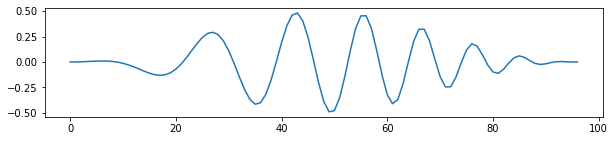

In [ ]:
w = get_window('hann', m, False)
wx = x[:m] * w
plot(wx)

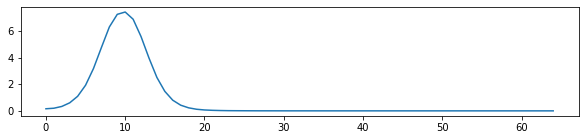

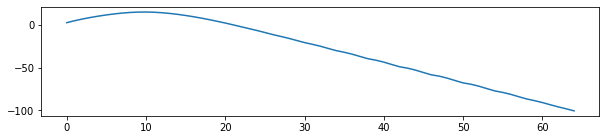

In [ ]:
m_x, p_x = fft_analysis(wx, n_fft=n_fft)
plot(m_x)
plot(p_x)

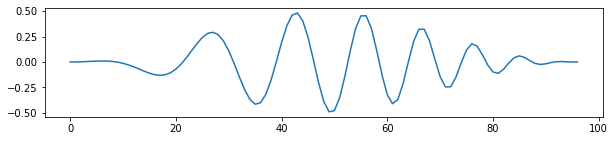

In [ ]:
wy = fft_synthesis(m_x, p_x, m)
plot(wy)

assert np.isclose(wx, wy).all()

In [ ]:
def gen_frames(x, m, h, w = None):
    x = np.pad(x, (m-h, 0), 'constant')
    i = 0
    while i < x.size:
        frame = x[i:i+m]
        if frame.size < m:
            frame = np.pad(frame, (0, m-frame.size), mode='constant')
        if w is not None:
            frame = frame*w
        yield frame
        i += h

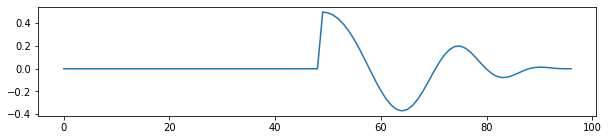

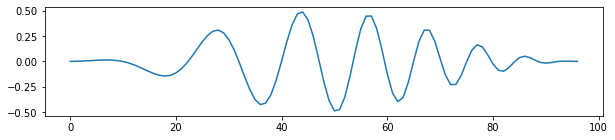

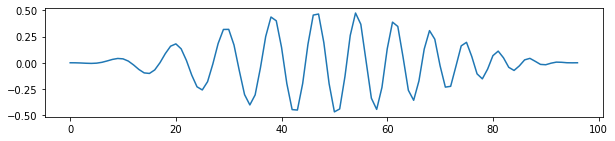

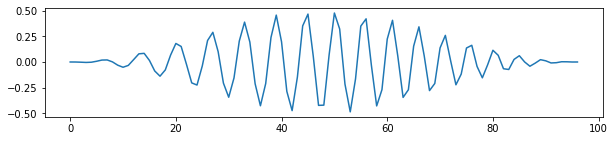

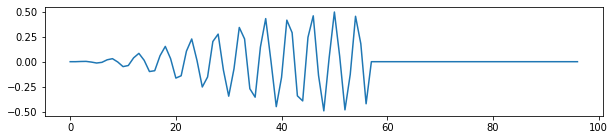

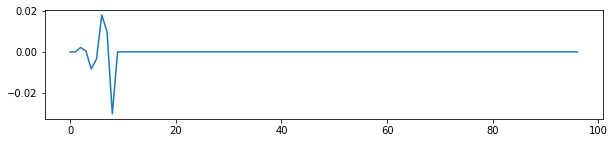

In [ ]:
frames = list(gen_frames(x, m, h, w))
for frame in frames:
    plot(frame)

In [ ]:
def synth_frames(frames, h, length: int = None):
    n_frames = len(frames)
    n_samples_frame = frames[0].size
    n_samples_total = n_samples_frame + h*(n_frames-1)
    y = np.zeros(n_samples_total, dtype=frames[0].dtype)
    for i, frame in enumerate(frames):
        offset_i = i*h
        y[offset_i:offset_i+n_samples_frame] += frame
    y = y[n_samples_frame-h:]
    if length is not None:
        y = y[:length]
    return y
    
y = synth_frames(frames, h, x.size)

In [ ]:
x.shape, y.shape

((200,), (200,))

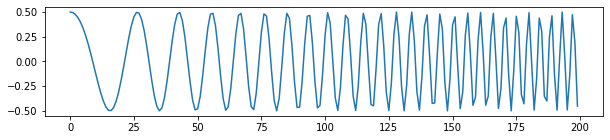

In [ ]:
plot(y)

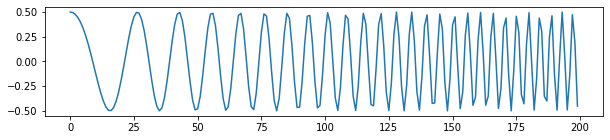

In [ ]:
plot(x)

In [ ]:
np.isclose(x, y).all()

True

In [ ]:
n = 100
h = 12
m = 37

x = np.ones(n)
w = get_window('blackman', m, False)
frames = list(gen_frames(x, m, h, w))
y = synth_frames(frames, h)


plt.plot(x)
plt.plot(y[:x.size])

In [ ]:
def display_cola(w, r, n):
    m = len(w)
    
    fig, ax = plt.subplots(1, figsize=(12, 3))
    
    offset = 0
    frame_sum = np.zeros(n)
    while offset <= n:
        end = min(offset + m, n)        
        frame = np.zeros(n)
        frame[offset:end] = w[:end - offset]
        ax.plot(frame)
        frame_sum += frame

        offset += r
        
    plt.plot(frame_sum)
    
    return frame_sum

In [ ]:
from scipy import signal

## Is COLA?

In [ ]:
r = 48
m = r*2 + 1
o = m - r
window = 'hann'
is_cola = signal.check_COLA(get_window(window, m, fftbins=False), m, o)
print('window  :', window)
print('win_len :', m)
print('hop_size:', r)
print('overlap :', o)
print('is_cola :', is_cola)

window  : hann
win_len : 97
hop_size: 48
overlap : 49
is_cola : True


In [ ]:
r = 12
m = r*3 + 1
o = m - r
window = 'blackman'
is_cola = signal.check_COLA(get_window(window, m, fftbins=False), m, o)
print('window  :', window)
print('win_len :', m)
print('hop_size:', r)
print('overlap :', o)
print('is_cola :', is_cola)

window  : blackman
win_len : 37
hop_size: 12
overlap : 25
is_cola : True


In [ ]:
r = 12
m = r*4
o = m - r
fftbins = True
window = 'blackmanharris'
is_cola = signal.check_COLA(get_window(window, m, fftbins=fftbins), m, o)
print('window  :', window)
print('win_len :', m)
print('hop_size:', r)
print('overlap :', o)
print('is_cola :', is_cola)

window  : blackmanharris
win_len : 48
hop_size: 12
overlap : 36
is_cola : True
